In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset
dataset.size

#identify patterns
#create dependant variable
#Takes finate number of values
#each of the values will be a class of this dependant variable created
#Building dependant variable in a way that of the values of this future dependant variable
#we are creating are actually the classes of this deependant varibale 


NameError: ignored

In [ ]:
#IMPORTING THE LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#IMPORTING THE DATASET
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values #Select column index 3 and 4
#Excludes column where countries are listed
#It has no impact on whatever independant variable we will create 
#Goal is to Identifies clusters and creates new dependant variable where the values will be clusters 


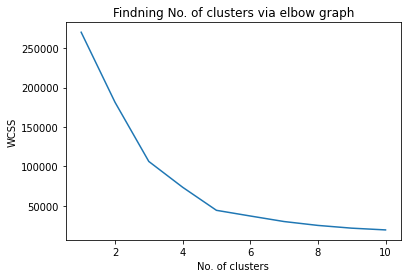

In [ ]:
#USING ELBOW METHOD TO FIND BEST NO. OF CLUSTERS
#optimum change in WCSS is no longer significant
#Scikit learn library already runs this 

from sklearn.cluster import KMeans
#for loop to run clusters 1-10 to see what is best
#Looking for best within cluster sum of squares
WCSS = [] #make empty list for wcss val
for i in range(1, 11): 
  #want to include 10 but go up to 11
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42 )
  #avoids random initialisation trap with ++
  #Then train K means with i number of clusters
  kmeans.fit(X) #fit X data into kmeans, only need data of the features no labelling 
  WCSS.append(kmeans.inertia_) #append new value into this list, call attribute of kmeans object
  #get WCSS value

plt.plot(range(1, 11), WCSS)
plt.title('Findning No. of clusters via elbow graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

#WCSS decreases its descent at 5 hence use 5 clusters
#Optimal number is 5 

In [ ]:
#TRAINING THE KMEANS MODEL ON DATASET USING OPTIMAL NUMBER OF CLUSTERS

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42 )
ypredict_kmeans = kmeans.fit_predict(X)
#build dependant variable where the values are the clusters
print(ypredict_kmeans)
#Which cluster each customer belongs to listed below

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


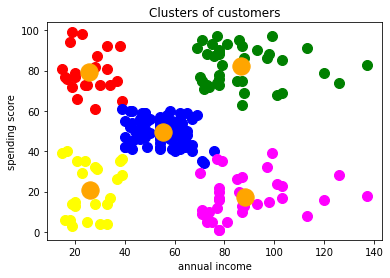

In [ ]:
#VISIALISE THE CLUSTERS ON A GRAPH AND THEIR CENTRIODS
plt.scatter(
    X[ypredict_kmeans == 0,0], # Cluster 0, index 0 of X
    X[ypredict_kmeans == 0,1], # Cluster 0, index 1 of X
    s = 100, c = 'red', label = 'cluster 1') 

plt.scatter(
    X[ypredict_kmeans == 1,0], # Cluster 1, index 0 of X
    X[ypredict_kmeans == 1,1], # Cluster 1, index 1 of X
    s = 100, c = 'blue', label = 'cluster 2') 

plt.scatter(
    X[ypredict_kmeans == 2,0], # Cluster 2, index 0 of X
    X[ypredict_kmeans == 2,1], # Cluster 2, index 1 of X
    s = 100, c = 'green', label = 'cluster 3') 

plt.scatter(
    X[ypredict_kmeans == 3,0], # Cluster 3, index 0 of X
    X[ypredict_kmeans == 3,1], # Cluster 3, index 1 of X
    s = 100, c = 'yellow', label = 'cluster 4') 

plt.scatter(
    X[ypredict_kmeans == 4,0], # Cluster 4, index 0 of X
    X[ypredict_kmeans == 4,1], # Cluster 4, index 1 of X
    s = 100, c = 'magenta', label = 'cluster 5') 

#plotting the centriods
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'orange', label = 'centriods')
#Take all rows but only X columns so 0 and 1

plt.title('Clusters of customers')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()